# Exploratory Data Analysis of Bank Loans 

## The Objective of Analysis :

### The aim is to find a pattern and giving advice regarding those borrowers who are likely to default so that Lending Club can know whom to give loans and how much to give .

#### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
#removing the warnings from rest of the notebook
warnings.filterwarnings("ignore")

## Data Sourcing

In [3]:
#Getting the data
inp1 = pd.read_csv("C:\\Users\\musta\\Downloads\\loan\\loan.csv",encoding  = "utf-8")
inp1

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

#### Understanding the data types of all columns 

In [4]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
inp1.shape

(39717, 111)

#### Fixing the rows and columns

In [6]:
# Shortlisting the columns which serves the need of analysis 
inp1 = inp1[["id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","purpose","revol_util","addr_state","dti","open_acc","revol_bal","total_acc","out_prncp","total_pymnt","total_rec_prncp","total_rec_int","last_pymnt_d","last_pymnt_amnt","last_credit_pull_d","application_type"]]

In [7]:
#finding the null values in entire dataframe 
inp1.isnull().sum()

id                        0
loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
revol_util               50
addr_state                0
dti                       0
open_acc                  0
revol_bal                 0
total_acc                 0
out_prncp                 0
total_pymnt               0
total_rec_prncp           0
total_rec_int             0
last_pymnt_d             71
last_pymnt_amnt           0
last_credit_pull_d        2
application_type          0
dtype: int64

In [8]:
#employement length columns seems to have the highest number of missing values
#But since the values aren't that large in number , we will drop the missing values
inp1.emp_length.fillna(value = inp1.emp_length.mode()[0],inplace = True)

In [9]:
#dropping the missing values in rest of the columns 
inp1.dropna(subset = ["last_pymnt_d","last_credit_pull_d","revol_util"], axis = 0,inplace = True)

In [10]:
#Checking if any column still has any missing values
#As we can see , there are no null values left to be dealt with!
inp1.isnull().sum()

id                     0
loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
revol_util             0
addr_state             0
dti                    0
open_acc               0
revol_bal              0
total_acc              0
out_prncp              0
total_pymnt            0
total_rec_prncp        0
total_rec_int          0
last_pymnt_d           0
last_pymnt_amnt        0
last_credit_pull_d     0
application_type       0
dtype: int64

#### Converting the data types of columns into suitable format

In [11]:
#converting the data type of length of employement column in a suitable format
inp1.emp_length = inp1.emp_length.apply(lambda x:int( 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [12]:
#Checking the data type of term variable and converting them into correct format if required.
inp1.term = inp1.term.apply(lambda x : float(x.replace("months",""))/12 )

In [13]:
#Converting the date time variables into suitable format
inp1.issue_d = pd.to_datetime(inp1.issue_d.str.upper(), format = "%b-%y" ,yearfirst = False)
inp1.last_pymnt_d = pd.to_datetime(inp1.last_pymnt_d.str.upper(), format = "%b-%y" ,yearfirst = False)
inp1.last_credit_pull_d = pd.to_datetime(inp1.last_credit_pull_d.str.upper(), format = "%b-%y" ,yearfirst = False)

In [14]:
#Converting the interest rate column in suitable data type
inp1.int_rate = inp1.int_rate.apply(lambda x : float(x.replace("%","")))

In [15]:
#Standardising the values of some numerical columns 
def Standardizing(x):
    return(x.apply(lambda x : int(round(x))))
           
inp1.installment = Standardizing(inp1.installment)
inp1.annual_inc = Standardizing(inp1.annual_inc)
inp1.out_prncp = Standardizing(inp1.out_prncp)
inp1.total_pymnt = Standardizing(inp1.total_pymnt)
inp1.total_rec_prncp = Standardizing(inp1.total_rec_prncp)
inp1.total_rec_int = Standardizing(inp1.total_rec_int)
inp1.last_pymnt_amnt = Standardizing(inp1.last_pymnt_amnt)
inp1.revol_util = inp1.revol_util.apply(lambda x :float(x.replace("%","")))

In [16]:
#Dropping the duplicated values if there are any:
inp1.duplicated(subset = None,keep = "first")
inp1.drop_duplicates(keep = "first",ignore_index = True,inplace = True)

In [17]:
inp1

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,revol_bal,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type
0,1077501,5000,5000,4975.0,3.0,10.65,163,B,10,RENT,...,13648,9,0,5863,5000,863,2015-01-01,172,2016-05-01,INDIVIDUAL
1,1077430,2500,2500,2500.0,5.0,15.27,60,C,0,RENT,...,1687,4,0,1009,456,435,2013-04-01,120,2013-09-01,INDIVIDUAL
2,1077175,2400,2400,2400.0,3.0,15.96,84,C,10,RENT,...,2956,10,0,3006,2400,606,2014-06-01,650,2016-05-01,INDIVIDUAL
3,1076863,10000,10000,10000.0,3.0,13.49,339,C,10,RENT,...,5598,37,0,12232,10000,2215,2015-01-01,357,2016-04-01,INDIVIDUAL
4,1075358,3000,3000,3000.0,5.0,12.69,68,B,1,RENT,...,27783,38,524,3513,2476,1037,2016-05-01,68,2016-05-01,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39593,92187,2500,2500,1075.0,3.0,8.07,78,A,4,MORTGAGE,...,7274,40,0,2823,2500,323,2010-07-01,81,2010-06-01,INDIVIDUAL
39594,90665,8500,8500,875.0,3.0,10.28,275,C,3,RENT,...,8847,9,0,9913,8500,1413,2010-07-01,282,2010-07-01,INDIVIDUAL
39595,90395,5000,5000,1325.0,3.0,8.07,157,A,0,MORTGAGE,...,9698,20,0,5272,5000,272,2008-04-01,0,2007-06-01,INDIVIDUAL
39596,90376,5000,5000,650.0,3.0,7.43,155,A,0,MORTGAGE,...,85607,26,0,5174,5000,174,2008-01-01,0,2007-06-01,INDIVIDUAL


#### Handling the Outliers

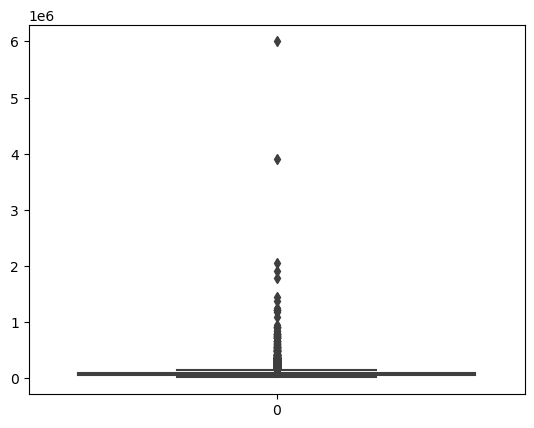

In [18]:
#As we can see in the below boxplot , annual_inc has a vast degree of outliers spectrum
sns.boxplot(inp1.annual_inc)
plt.show()

In [19]:
# To ascertain the absolute value of the outlier , we can use :-
np.quantile(inp1.annual_inc,[0.75,0.80,0.90,0.95])

array([ 82500.,  90000., 116000., 142000.])

In [20]:
# removing the outliers by limiting the maximum value of annual income to 2,00,000.
inp1 = inp1[inp1["annual_inc"] < 200000]

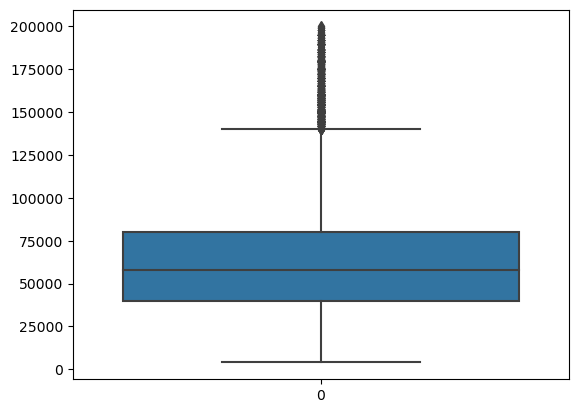

In [21]:
# As we can see in the graph below , the outliers still exists, but this degree of outliers are acceptable
sns.boxplot(inp1.annual_inc)
plt.show()

## Data Visualisation and Analysis

### UNIVARIATE ANALYSIS

#### 1. From the below graph , we can derive the fact that highest number of loan given is of the category B followed by A and C.    

#### Although , A Category loans are good , B/C category of loans are given to low credit quality borrowers and are charged higher 

#### rates of interests which could be the indicator of bad debts .

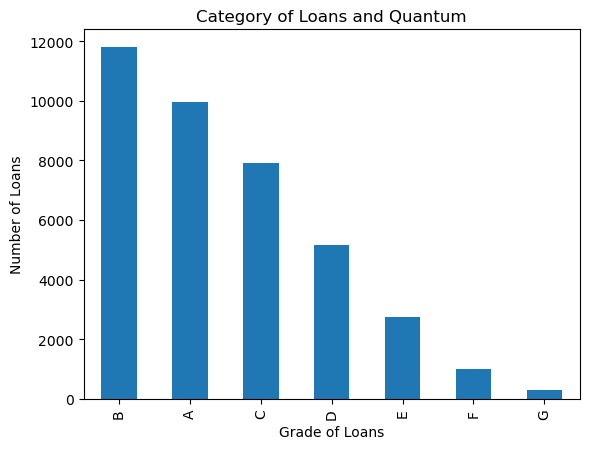

In [22]:
#Plotting the bar graph of grade of loans 
inp1.grade.value_counts().plot.bar()
plt.ylabel("Number of Loans")
plt.xlabel("Grade of Loans")
plt.xticks(rotation = 90)
plt.title("Category of Loans and Quantum")
plt.show()

#### 2. From the below graph , its quite clear that the reason of debt annhilation could be because of non-verification of income . 

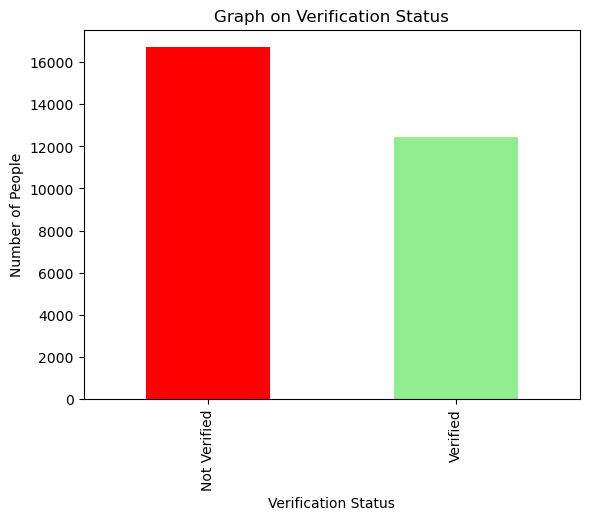

In [23]:
# Plotting the bar graph of verification status variable
inp0 = inp1[~(inp1.verification_status == "Source Verified")]
inp0.verification_status.value_counts().plot.bar(color = ["red","lightgreen"])
plt.title("Graph on Verification Status")
plt.xlabel("Verification Status")
plt.ylabel("Number of People")
plt.show()

#### 3. Another contributing factor of bad debts could be having large number of credit lines . Having large number of credit lines 

####     (more than 3 as per wikipedia) makes it difficult to keep record of monthly payments leading to bad debts . Large number of people have taken 

####     8-12 credit lines.

Text(0, 0.5, 'Number of People')

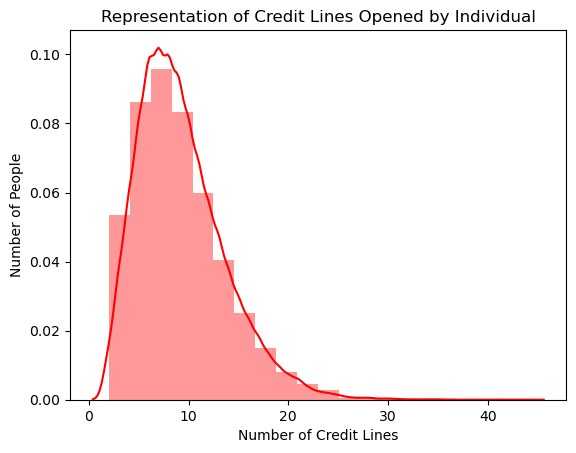

In [24]:
# making distribution plot of credit lines oepend by people.Distribution plot is histogram with kde curve.
sns.distplot(inp1.open_acc, bins = 20,color = "red")
plt.title("Representation of Credit Lines Opened by Individual")
plt.xlabel("Number of Credit Lines")
plt.ylabel("Number of People")


#### 4. From the below graph , people who have to pay rent are large in number making it difficult for them to meet the monthly credit 

####      repayments requirements . People who have thier house mortgaged could be considered as delinquents assuming they are 

####      middle-class or poor

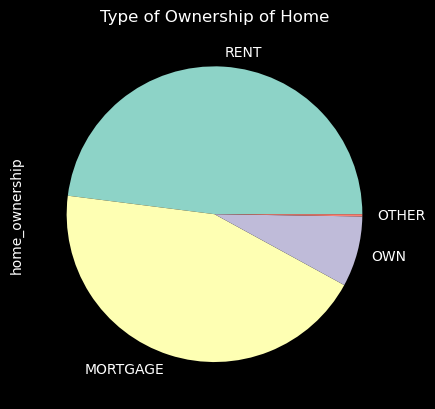

In [25]:
#preparing a bar graph on home_ownership variable.
inp3 = inp1[~(inp1.home_ownership =="NONE")]
plt.style.use('dark_background')
inp3.home_ownership.value_counts().plot.pie()
plt.title("Type of Ownership of Home")
plt.show()

#### 5.Assuming the per capita income in USA (70,000 Dollars) is even across nearly all states , then as we can see , a lot of people 

#### are in the 0-40k or 40k-80k range can be considered as lower-middle class thus making them more vulnerable to bad credit score.

In [26]:
inp1["annual_inc_binned"] = pd.cut(inp1.annual_inc,np.arange(0,240000,40000))
inp1.annual_inc_binned.value_counts()

(40000, 80000]      19425
(0, 40000]           9814
(80000, 120000]      7084
(120000, 160000]     2002
(160000, 200000]      566
Name: annual_inc_binned, dtype: int64

### BIVARIATE/MULTIVARIATE ANALYSIS

#### 6. As we can see, as the grades of loan decreases , the interest rates increases indicating that higher the risk , higher will be the 

####     rewards . But this concept can back-fire because of the fact that , worse grades of loans can threaten the profit motive if 

####     borrowers doesn't repay.

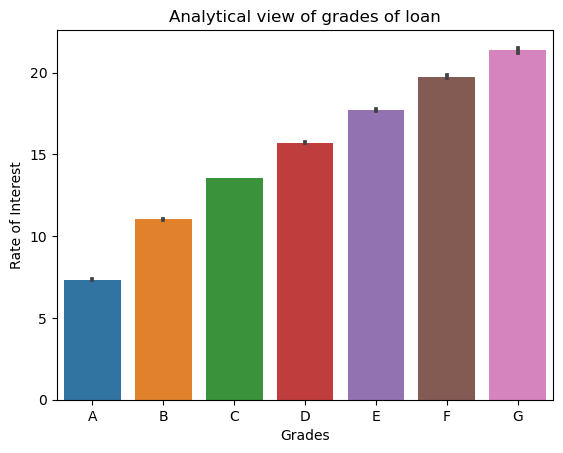

In [27]:
# making a bar graphs of grades of loans in respect to interest rates
plt.style.use("default")
sns.barplot(data = inp1 , x = "grade",y = "int_rate", order = ["A","B","C","D","E","F","G"])
plt.title("Analytical view of grades of loan")
plt.xlabel("Grades")
plt.ylabel("Rate of Interest")
plt.show()

#### 7. It is evident from the graph, as the income increases , the amount of loan also increases . But what's more interesting is the 

####    fact that , with increase of the aforementioned two variables , the charged off ratio is also increasing making it clear that             

####    company has higher tendency to loose money if large amount of loan given to higher income groups .

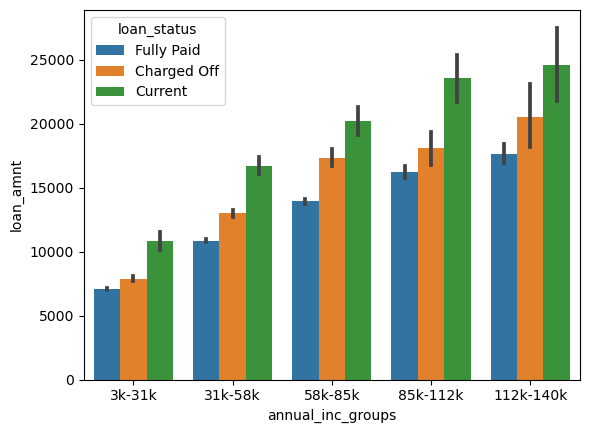

In [28]:
#making bar graph of loan amount and annual income 
inp1['annual_inc_groups'] = pd.cut(inp1['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = inp1)
plt.show()

#### 8. One may not able to draw inferences from scatterplot , but the histogram on the outerpanes axis makes it evident that large 

####      amount of loans are taken for debt consolidation which indicates the people's inability to pay previous loans . So instead of 

####      blocking the funds into giving loan as debt consolidation , Lending Club should give loan for other purposes.

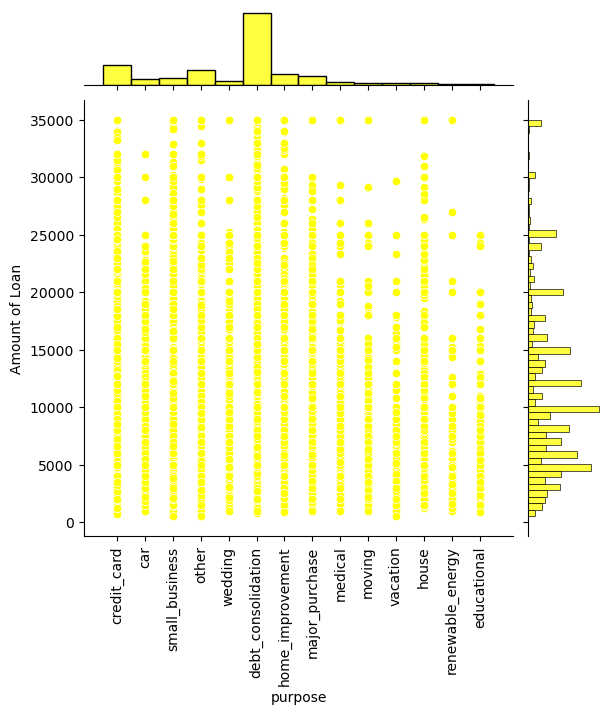

In [29]:
#making jointplot with purpose on x-axis and loan amount of y-axis
sns.jointplot(data = inp1 , x = "purpose", y = "loan_amnt" , color = "yellow")
plt.xticks(rotation = 90)
plt.ylabel("Amount of Loan")
plt.show()


#### 9. Now the question arises , give loans as for which purpose ? The answer is :-

#####  I. House
#####  II. Small Business
#####  III. Credit Card

#### The reason for picking installment variable is that , the higher the installments , higher will be the turnover . And as turnover  

####  increases , the credit multiplier does its work and increases the overall money supply resulting in higher profits.

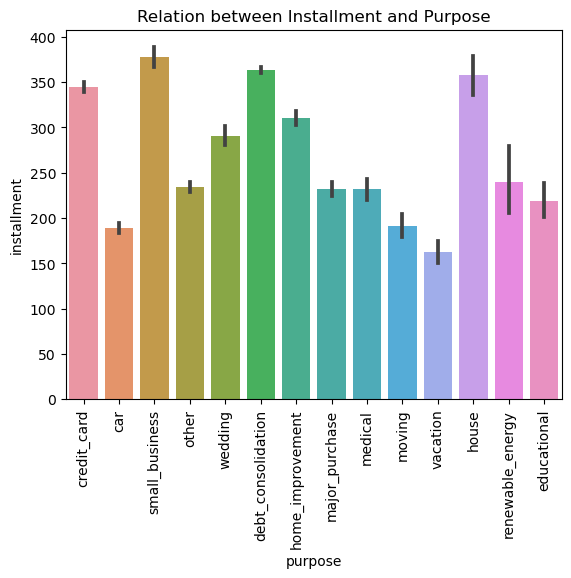

In [30]:
#creating bar graph of installment and purpose variable
sns.barplot(data = inp1 , x = "purpose", y = "installment")
plt.title("Relation between Installment and Purpose")
plt.xticks(rotation = 90)
plt.show()

#### 10. From the heatmap , one can state that small businesses and house building are such purposes which results in the highest 

####      utilisation of loan taken . Giving loans for productive work boosts the money supply , resulting in credit creation multiplied by 

####      reciprocal of cash reserve ratio which leads to higher profits of not only one bank but the entire banking industry. It also 

####      proves the above mentioned analysis.

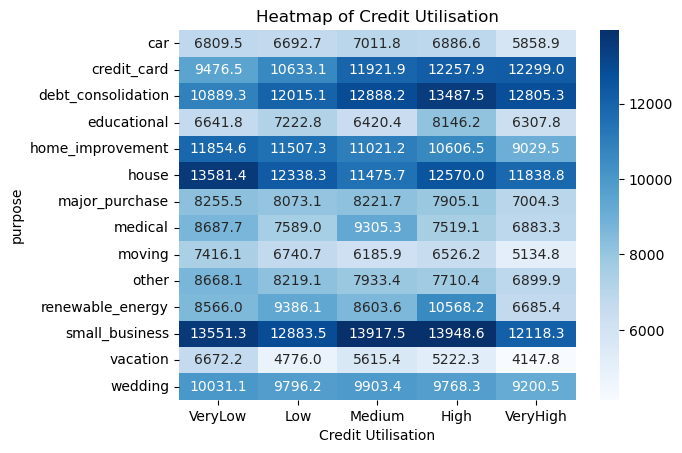

In [31]:
# making heatmap out of credit utilisation variable
inp1["revol_util_binned_corr"] =pd.qcut(inp1.revol_util , 5 , ["VeryLow","Low","Medium","High","VeryHigh"])
a = pd.pivot_table(data = inp1 , columns = "revol_util_binned_corr", index = "purpose",values = "loan_amnt")
sns.heatmap(a, annot = True, cmap = "Blues",fmt = ".1f")
plt.title("Heatmap of Credit Utilisation")
plt.xlabel("Credit Utilisation")
plt.show()
